## Pandas Primer part 8
------------------

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns; sns.set()
from scipy import stats as st
import matplotlib.pyplot as plt

## More on Visualization

In [2]:
np.random.seed(1000)
data = np.random.standard_normal((500, 2)).cumsum(axis=0)
index = pd.date_range(start='2015-1-1', periods=len(data), freq='B')

In [3]:
df21 = pd.DataFrame(data, index=index, columns=['A', 'B'])

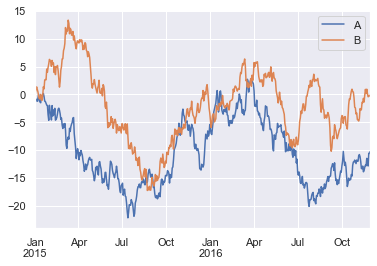

In [4]:
df21.plot();

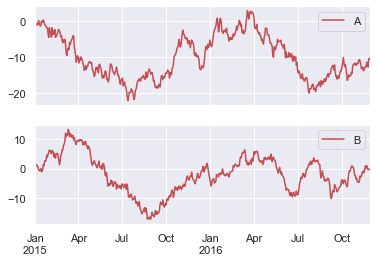

In [5]:
df21.plot(subplots=True, color='r');

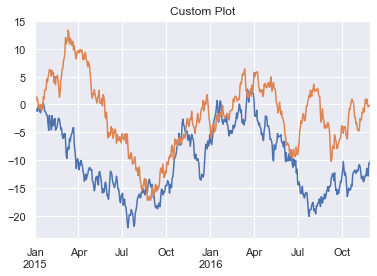

In [6]:
df21.plot(legend=False, title='Custom Plot');

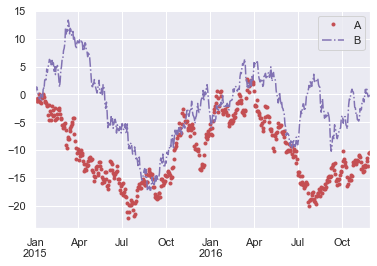

In [7]:
df21.plot(style=['r.', 'm-.']);

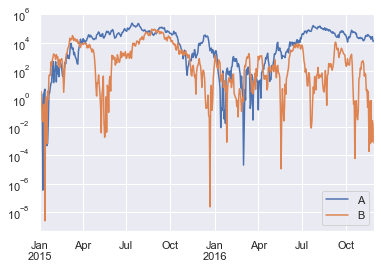

In [8]:
(df21 ** 4).plot(logy=True);

In [9]:
df21['B'] = df21['B'] * 100

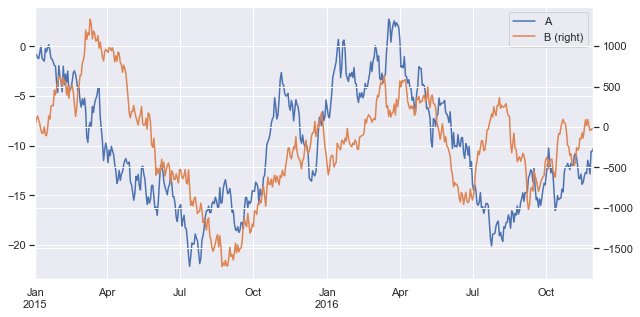

In [10]:
df21.plot(secondary_y='B', grid=True, figsize=(10, 5));

### from np.datetime64 to timestamp
<a id='cell104'></a>

In [11]:
d = '2017-03-28T00:00:00.000000000'

In [12]:
np.datetime64(d)

numpy.datetime64('2017-03-28T00:00:00.000000000')

In [13]:
tstamp = pd.Timestamp(d)

In [14]:
tstamp

Timestamp('2017-03-28 00:00:00')

## Importing Excel file with multiple sheets
<a id='cell82'></a>

In [15]:
# Step 1 --> Import excel file into Python
CF= pd.read_excel("Loans.xlsx",sheet_name='CF',header=0)

In [16]:
CF

,Cash Flow,Category,Type,Particulars,"2,017","2,018","2,019","2,020"
0,Inflows,Sponsorship,Income,Income,60000.0,60000.0,60000.0,60000.0
1,Inflows,Sponsorship,Income,Income,35000.0,35000.0,35000.0,35000.0
2,Inflows,Sponsorship,Income,Income,10000000.0,10000000.0,10000000.0,10000000.0
3,Inflows,Hotels,Growth,F Holtel,17482300.0,19664277.0,22149436.0,26275705.0
4,Inflows,Hotels,Growth,F A Hotel,7500000.0,10000000.0,12000000.0,14250000.0
...,...,...,...,...,...,...,...,...
224,Outflows,Yacht Expenses,Expenses,Moonlight II - Monthly Funding,-11340000.0,-15120000.0,-15120000.0,-15120000.0
225,Outflows,Yacht Expenses,Expenses,Moonlight II - Refit Expenses,0.0,-1640000.0,-1640000.0,-1640000.0
226,Outflows,Yacht Expenses,Expenses,Small Boats & Other Boats,-900000.0,-500000.0,-500000.0,-500000.0
227,Outflows,Yacht Expenses,Expenses,Moonlight Expenses - DPO,-900000.0,-1000000.0,-1000000.0,-1000000.0


## Sending data to Excel File
<a id='cell100'></a>

In [17]:
CF.to_excel("LoansToExcel.xlsx",sheet_name='CF')

## Pivot tables in Pandas
<a id='cell106'></a>

In [18]:
SBKCF = CF.query('Type != ["Loan Inflow"]')

In [19]:
SBKCF

,Cash Flow,Category,Type,Particulars,"2,017","2,018","2,019","2,020"
0,Inflows,Sponsorship,Income,Income,60000.0,60000.0,60000.0,60000.0
1,Inflows,Sponsorship,Income,Income,35000.0,35000.0,35000.0,35000.0
2,Inflows,Sponsorship,Income,Income,10000000.0,10000000.0,10000000.0,10000000.0
3,Inflows,Hotels,Growth,F Holtel,17482300.0,19664277.0,22149436.0,26275705.0
4,Inflows,Hotels,Growth,F A Hotel,7500000.0,10000000.0,12000000.0,14250000.0
...,...,...,...,...,...,...,...,...
224,Outflows,Yacht Expenses,Expenses,Moonlight II - Monthly Funding,-11340000.0,-15120000.0,-15120000.0,-15120000.0
225,Outflows,Yacht Expenses,Expenses,Moonlight II - Refit Expenses,0.0,-1640000.0,-1640000.0,-1640000.0
226,Outflows,Yacht Expenses,Expenses,Small Boats & Other Boats,-900000.0,-500000.0,-500000.0,-500000.0
227,Outflows,Yacht Expenses,Expenses,Moonlight Expenses - DPO,-900000.0,-1000000.0,-1000000.0,-1000000.0


In [20]:
SBKCF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225 entries, 0 to 228
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Cash Flow    225 non-null    object 
 1   Category     225 non-null    object 
 2   Type         225 non-null    object 
 3   Particulars  225 non-null    object 
 4   2,017        225 non-null    float64
 5   2,018        225 non-null    float64
 6   2,019        225 non-null    float64
 7   2,020        225 non-null    float64
dtypes: float64(4), object(4)
memory usage: 15.8+ KB


In [21]:
SBKCF.describe()

,"2,017","2,018","2,019","2,020"
count,2.250000e+02,2.250000e+02,2.250000e+02,2.250000e+02
mean,-7.529078e+05,-1.260925e+06,-4.732369e+05,-2.006662e+05
std,1.232449e+07,1.266866e+07,1.456156e+07,1.729989e+07
min,-5.832341e+07,-6.218087e+07,-7.371513e+07,-7.529465e+07
25%,-1.155184e+06,-1.000000e+06,-8.410054e+05,-7.440000e+05
50%,-1.020000e+05,-7.300000e+04,-3.877400e+04,-1.800000e+04
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,9.785618e+07,1.000000e+08,1.554300e+08,2.072400e+08


In [22]:
SBKFiltered = pd.pivot_table(SBKCF, index = ['Cash Flow','Type'],
              values = ['2,017','2,018','2,019','2,020'],\
              aggfunc = np.sum,
              margins = True)

In [23]:
SBKFiltered

2,017         2,018         2,019  \
Cash Flow Type                                                      
Inflows   Growth         2.678230e+07  3.701093e+07  4.618030e+07   
          Income         2.095294e+08  2.389147e+08  2.410609e+08   
          Sale Inflow    1.950938e+08  1.000000e+08  1.554300e+08   
Outflows  Expenses      -2.993488e+08 -3.348661e+08 -2.644935e+08   
          Investment    -6.953240e+07 -5.684754e+07 -5.675763e+07   
          Loan outflows -2.319286e+08 -2.679202e+08 -2.278984e+08   
All                     -1.694043e+08 -2.837082e+08 -1.064783e+08   

                                2,020  
Cash Flow Type                         
Inflows   Growth         5.142028e+07  
          Income         2.385359e+08  
          Sale Inflow    2.072400e+08  
Outflows  Expenses      -2.668893e+08  
          Investment    -4.913358e+07  
          Loan outflows -2.263232e+08  
All                     -4.514989e+07

In [24]:
SBKFiltered = SBKFiltered.applymap(lambda x: '{:,.0f}'.format(x))

In [25]:
SBKFiltered

2,017         2,018         2,019  \
Cash Flow Type                                                      
Inflows   Growth           26,782,300    37,010,934    46,180,305   
          Income          209,529,393   238,914,746   241,060,921   
          Sale Inflow     195,093,846   100,000,000   155,430,000   
Outflows  Expenses       -299,348,818  -334,866,086  -264,493,500   
          Investment      -69,532,401   -56,847,542   -56,757,632   
          Loan outflows  -231,928,572  -267,920,238  -227,898,395   
All                      -169,404,252  -283,708,186  -106,478,302   

                                2,020  
Cash Flow Type                         
Inflows   Growth           51,420,281  
          Income          238,535,921  
          Sale Inflow     207,240,000  
Outflows  Expenses       -266,889,325  
          Investment      -49,133,583  
          Loan outflows  -226,323,181  
All                       -45,149,888

In [26]:
SBKFiltered1 = pd.pivot_table(SBKCF, index = ['Cash Flow','Type'],
              values = ['2,017','2,018','2,019','2,020'],
              aggfunc = {'2,017':np.sum,
                         '2,018':np.mean,
                         '2,019':[min, max, np.mean],
                         '2,020':st.describe})
             # margins = True)


In [27]:
SBKFiltered1

2,017         2,018        2,019  \
                                  sum          mean          max   
Cash Flow Type                                                     
Inflows   Growth         2.678230e+07  9.252734e+06   22149436.0   
          Income         2.095294e+08  5.972869e+06   59453366.0   
          Sale Inflow    1.950938e+08  1.428571e+07  155430000.0   
Outflows  Expenses      -2.993488e+08 -2.358212e+06          0.0   
          Investment    -6.953240e+07 -4.737295e+06          0.0   
          Loan outflows -2.319286e+08 -1.339601e+07          0.0   

                                                   \
                                 mean         min   
Cash Flow Type                                      
Inflows   Growth         1.154508e+07   4800000.0   
          Income         6.026523e+06         0.0   
          Sale Inflow    2.220429e+07         0.0   
Outflows  Expenses      -1.862630e+06 -60000000.0   
          Investment    -4.729803e+06 -23800000.0   
          Loan outflows -1.139492e+07 -73715131.0   

                                                                     2,020  
                                                                  describe  
Cash Flow Type                                                              
Inflows   Growth         (4, (4800000.0, 26275705.0), 12855070.25, 9754...  
          Income         (40, (0.0, 59453366.0), 5963398.025, 116955665...  
          Sale Inflow    (7, (0.0, 207240000.0), 29605714.285714287, 61...  
Outflows  Expenses       (142, (-60000000.0, 0.0), -1879502.2913548471,...  
          Investment     (12, (-29000000.0, 0.0), -4094465.265232974, 6...  
          Loan outflows  (20, (-75294647.0, 0.0), -11316159.05, 4161128...